In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df = pd.read_csv("telecom_users_prep.csv")
df = df.drop(columns=['gender', 'PhoneService', 'Unnamed: 0'])

label_encoder = preprocessing.LabelEncoder()

#MultipleLines     no = 0, No phone service = 1 , yes = 2
#InternetService   DSL = 0, Fiber optic = 1, No = 2
#Contact           Month-to-month = 0, One-year = 1 , Two-year = 2
#PaymentMethod     Bank transfer = 0, Credit card = 1, Electronic check = 2

for column in df.columns:
    if column not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']:
        df[column] = label_encoder.fit_transform(df[column])
        df[column] = df[column].astype('object')

df.fillna(value=0, inplace=True)
# fill 0 in TotalCharges for tenure = 0 rows
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

df

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,72,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
1,0,0,0,44,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
2,1,1,0,38,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
3,0,0,0,4,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
4,0,0,0,2,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0,1,0,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00,1
5982,0,1,1,23,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30,0
5983,0,1,1,12,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05,0
5984,1,0,0,12,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15,1


## Feature Selection using rfecv

In [2]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

array = df.values
X = array[:,0:-1]
Y = array[:,-1].astype('int64')

rfecv = RFECV(tree.DecisionTreeClassifier(random_state=1) , scoring='accuracy')
fit = rfecv.fit(X, Y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

#Partner,Dependents,tenure, InternetService, OnlineSecurity, DeviceProtection
#Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

Num Features: 14
Selected Features: [ True  True  True  True  True  True  True False  True  True False False
  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 3 1 1 4 2 1 1 1 1 1]


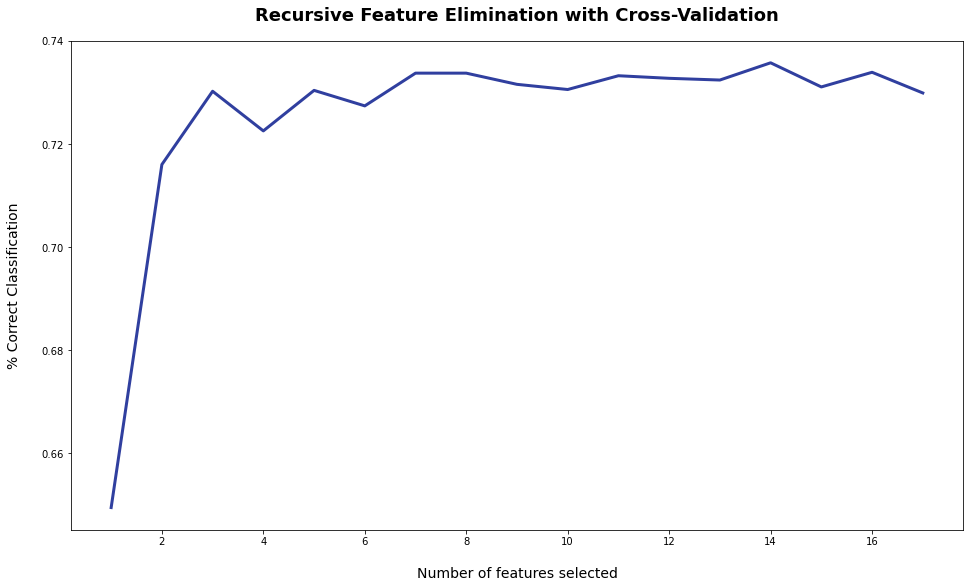

In [3]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [4]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from graphviz import Source
from IPython.display import SVG

df_sel = df.copy(deep=False)

#select some feature
features = np.append(fit.support_, [True])
df_sel = df.drop(df.columns[[0,4,7,9,10,11]], axis=1)

df_sel

,Partner,Dependents,tenure,InternetService,OnlineSecurity,DeviceProtection,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1,72,2,1,1,2,0,1,24.10,1734.65,0
1,0,0,44,1,0,2,0,1,1,88.15,3973.20,0
2,1,0,38,1,0,0,0,1,0,74.95,2869.85,1
3,0,0,4,0,0,0,0,1,2,55.90,238.50,0
4,0,0,2,0,2,2,0,0,2,53.45,119.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,1,2,0,0,1,2,95.00,95.00,1
5982,1,1,23,0,2,2,2,1,1,91.10,2198.30,0
5983,1,1,12,2,1,1,0,1,2,21.15,306.05,0
5984,0,0,12,1,0,2,0,1,2,99.45,1200.15,1


## Handle Imbalance Class

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

array = df_sel.values
class0_count, class1_count = df_sel['Churn'].value_counts()

# Separate class
class_0 = df_sel[df_sel['Churn'] == 0]
class_1 = df_sel[df_sel['Churn'] == 1]

class_0_under = class_0.sample(class1_count)
under_df = pd.concat([class_0_under, class_1], axis=0).values

X = under_df[:,0:-1]
y = under_df[:,-1].astype('int64')

## Normalization for ANN

In [6]:
df_sel.loc[:,['tenure']] = (df_sel['tenure'] - df_sel['tenure'].min()) / (df_sel['tenure'].max() - df_sel['tenure'].min())
df_sel.loc[:,['MonthlyCharges']] = (df_sel['MonthlyCharges'] - df_sel['MonthlyCharges'].min()) / (df_sel['MonthlyCharges'].max() - df_sel['MonthlyCharges'].min())
df_sel.loc[:,['TotalCharges']] = (df_sel['TotalCharges'] - df_sel['TotalCharges'].min()) / (df_sel['TotalCharges'].max() - df_sel['TotalCharges'].min())

array = df_sel.values
class0_count, class1_count = df_sel['Churn'].value_counts()

# Separate class
class_0 = df_sel[df_sel['Churn'] == 0]
class_1 = df_sel[df_sel['Churn'] == 1]

class_0_under = class_0.sample(class1_count)
under_df = pd.concat([class_0_under, class_1], axis=0).values

X_nor = under_df[:,0:-1]
y_nor = under_df[:,-1].astype('int64')

df_sel.loc[:,['tenure','MonthlyCharges','TotalCharges']].head()

,tenure,MonthlyCharges,TotalCharges
0,1.000000,0.058209,0.199734
1,0.611111,0.695522,0.457489
2,0.527778,0.564179,0.330445
3,0.055556,0.374627,0.027462
4,0.027778,0.350249,0.013760


## Random Forest

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
# print(X_train, X_test, )
precision = []
accuracy = []
report = []
maxi_pre = 0
for i in range(1,100):
    clf = RandomForestClassifier(class_weight= {0: 1, 1: i}, criterion='entropy', bootstrap= True, warm_start= True, random_state= 1)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
  
    precision.append(classification_report(y_test,y_pred, output_dict=True)['1']['precision'])
    accuracy.append(classification_report(y_test,y_pred, output_dict=True)['accuracy'])
    report.append(classification_report(y_test,y_pred))

In [8]:
print(precision.index(max(precision)) +1, max(precision), accuracy[precision.index(max(precision))])
print(report[precision.index(max(precision))], report[accuracy.index(max(accuracy))])

50 0.731629392971246 0.7448818897637796
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       328
           1       0.73      0.75      0.74       307

    accuracy                           0.74       635
   macro avg       0.74      0.74      0.74       635
weighted avg       0.75      0.74      0.74       635
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       328
           1       0.73      0.75      0.74       307

    accuracy                           0.74       635
   macro avg       0.74      0.74      0.74       635
weighted avg       0.75      0.74      0.74       635



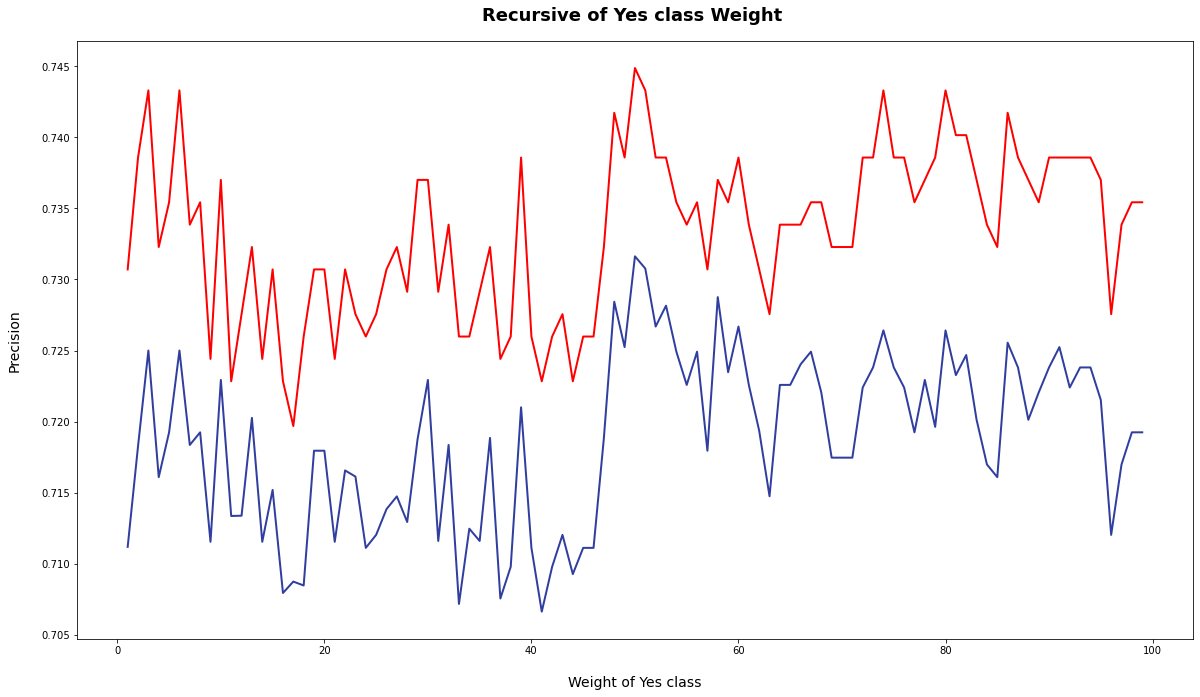

In [9]:
# show appropriate weight
plt.figure(figsize=(20, 11))
plt.title('Recursive of Yes class Weight ', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Weight of Yes class', fontsize=14, labelpad=20)
plt.ylabel('Precision', fontsize=14, labelpad=20)
plt.plot(range(1, 100), precision, color='#303F9F', linewidth=2)
plt.plot(range(1, 100), accuracy, color='red', linewidth=2)

plt.show()

## SVM

In [10]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, C=1, gamma=0.21, random_state= 1)
clf = svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.90      0.70       328
           1       0.72      0.28      0.41       307

    accuracy                           0.60       635
   macro avg       0.65      0.59      0.55       635
weighted avg       0.65      0.60      0.56       635



## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

glm = LogisticRegression(random_state = 1, max_iter= 500, class_weight= {0: 2, 1: 1} )
glm.fit(X_train, y_train)

y_pred = glm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       328
           1       0.76      0.65      0.70       307

    accuracy                           0.73       635
   macro avg       0.74      0.73      0.73       635
weighted avg       0.74      0.73      0.73       635



## Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
nbm = GaussianNB()
nbm.fit(X_train, y_train)

y_pred = nbm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       328
           1       0.69      0.81      0.75       307

    accuracy                           0.73       635
   macro avg       0.74      0.73      0.73       635
weighted avg       0.74      0.73      0.73       635



## Stochastic Gradient Descent

In [13]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.87      0.72       328
           1       0.75      0.42      0.54       307

    accuracy                           0.65       635
   macro avg       0.68      0.64      0.63       635
weighted avg       0.68      0.65      0.63       635



## Neural Network

In [14]:
from numpy.random import seed
import tensorflow

from keras.models import Sequential
from keras.layers import Dense, Dropout
from ann_visualizer.visualize import ann_viz
import keras

def create_model(lyrs=[11], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    tensorflow.random.set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=11, activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dropout (Dropout)            (None, 11)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 12        
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_nor, y_nor, test_size=0.2, random_state=1) # 80% training and 20% test

#training
epochs = 100
batch_size = 32
training = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 3s 28ms/step - loss: 0.8442 - accuracy: 0.4869 - val_loss: 0.6475 - val_accuracy: 0.5787
Epoch 2/100
64/64 [==============================] - 0s 2ms/step - loss: 0.6207 - accuracy: 0.6367 - val_loss: 0.5746 - val_accuracy: 0.7264
Epoch 3/100
64/64 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.7380 - val_loss: 0.5510 - val_accuracy: 0.7264
Epoch 4/100
64/64 [==============================] - 0s 5ms/step - loss: 0.5148 - accuracy: 0.7447 - val_loss: 0.5450 - val_accuracy: 0.7382
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7674 - val_loss: 0.5421 - val_accuracy: 0.7343
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7583 - val_loss: 0.5405 - val_accuracy: 0.7382
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.7491 - val_loss: 0.5392 - val_accuracy: 0.7343
Epoch 8/100


In [16]:
y_pred_net = np.round(model.predict(X_test))
print(classification_report(y_test,y_pred_net))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       328
           1       0.71      0.81      0.76       307

    accuracy                           0.75       635
   macro avg       0.75      0.75      0.75       635
weighted avg       0.75      0.75      0.75       635




mean_val_accuracy: 74.72%


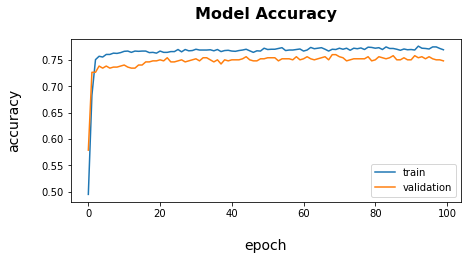

In [17]:
val_accuracy = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('mean_val_accuracy', val_accuracy*100))

# summarize history for accuracy
plt.figure(figsize=(7, 3))
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('accuracy',fontsize=14, labelpad=20)
plt.xlabel('epoch',fontsize=14, labelpad=20)
plt.legend(['train', 'validation'], loc='lower right')
plt.show()


## Neural network hyperparameter tuning

### batch_size and epoch

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define parameters
batch_size = [16, 32, 64]
epochs = [50, 100, 150, 250, 500]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END ...........................batch_size=16, epochs=50; total time=   3.5s
[CV] END ...........................batch_size=16, epochs=50; total time=   3.5s
[CV] END ...........................batch_size=16, epochs=50; total time=   3.6s
[CV] END ..........................batch_size=16, epochs=100; total time=   6.6s
[CV] END ..........................batch_size=16, epochs=100; total time=   6.4s
[CV] END ..........................batch_size=16, epochs=100; total time=   6.7s


In [ ]:
# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

### optimizer

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=500, batch_size=16, verbose=0)

# define parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

### number of neurons

In [ ]:
seed(42)
tensorflow.random.set_seed(42)

# create model
model = KerasClassifier(build_fn=create_model, epochs=500, batch_size=16, verbose=0)

# define parameters
layers = [(32,8),(11,6,3),(32,16,8,4,2)]
param_grid = dict(lyrs=layers)

grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

### Activation function

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=500, batch_size=16, verbose=0)

# define parameters
activation = ['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear']
param_grid = dict(act=activation)

grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

### Dropout rate

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=500, batch_size=16, verbose=0)

# define parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)

grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

### Final model Neural Network

In [ ]:
# create final model
model = create_model(lyrs=[32, 16, 8, 4, 2], dr=0.5, act='linear', opt='Adam')

print(model.summary())

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)
ann_viz(model, title="Chrun ANN")

In [ ]:
#training

epochs = 500
batch_size = 16
training = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

In [ ]:
y_pred_net = np.round(model.predict(X_test))
print(classification_report(y_test,y_pred_net))

In [ ]:
val_accuracy = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('mean_val_accuracy', val_accuracy*100))

# summarize history for accuracy
plt.figure(figsize=(16, 8))
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('accuracy',fontsize=14, labelpad=20)
plt.xlabel('epoch',fontsize=14, labelpad=20)
plt.legend(['train', 'validation'], loc='lower right')
plt.show()